### 01. 주가 단순 비교

In [3]:
!pip install pandas_datareader

In [7]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=d4650abe73c84cda7d62abfa8b8c2a9c70677e080f98fb90e6f782a3467328f2
  Stored in directory: c:\users\maerad7\appdata\local\pip\cache\wheels\68\72\87\a384b8b8139f2489024464d6f5937e6acb2054c57d25519fb9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=0282ce277e8d95061a13313bcb455646815980c4119b75b0d578ca60583d5fe7
  Stored in directory: c:\users\maerad7\appdata\local\pip\cache\wheels\5e\8a\c4\59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking


In [16]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
# volume : 거래량
# adj close : 수정종가 - 액면 분할 등으로 인해 주식가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식가격에 맞춰 수정하여 표시한 가격
# close : 종가

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
dow

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
...,...,...,...,...,...,...
2020-12-23,30046.730469,30292.529297,30046.730469,30129.830078,30129.830078,274050000
2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000


In [11]:
sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT',start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
sec

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997
...,...,...,...,...,...,...
2020-12-23,72400.0,74000.0,72300.0,73900.0,73900.000000,19411326
2020-12-24,74100.0,78800.0,74000.0,77800.0,77800.000000,32502870
2020-12-28,79000.0,80100.0,78200.0,78700.0,78700.000000,40085044


In [13]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-03,92.959999,94.930000,92.449997,94.070000,90.590263,31142500
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.639946,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.660728,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.265900,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.354095,27327400
...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,221.020004,18699600
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.750000,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.960007,17933500


In [14]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=652, freq=None)

In [15]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-03,92.959999,94.930000,92.449997,94.070000,90.590263,31142500
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.639946,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.660728,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.265900,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.354095,27327400
...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,221.020004,18699600
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.750000,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.960007,17933500


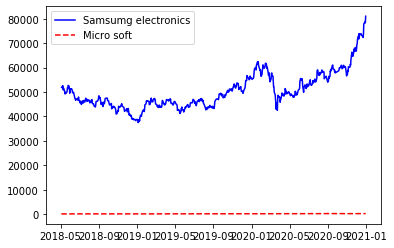

In [18]:
plt.plot(sec.index,sec.Close,'b',label='Samsumg electronics')
plt.plot(msft.index,msft.Close, 'r--', label='Micro soft')
plt.legend(loc='best')
plt.show()

### 02. 일간 변동률로 주가 비교하기

In [20]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 652, dtype: float64

In [25]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 652, dtype: float64

In [26]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-12-23    72300.0
2020-12-24    73900.0
2020-12-28    77800.0
2020-12-29    78700.0
2020-12-30    78300.0
Name: Close, Length: 652, dtype: float64

In [28]:
sec_dpc = ((sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1))*100
sec_dpc

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2020-12-23    2.213001
2020-12-24    5.277402
2020-12-28    1.156812
2020-12-29   -0.508259
2020-12-30    3.448276
Name: Close, Length: 652, dtype: float64

### 03. 주가 일간 변동률 히스토그램

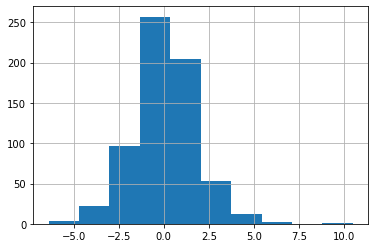

In [30]:
sec_dpc.hist()

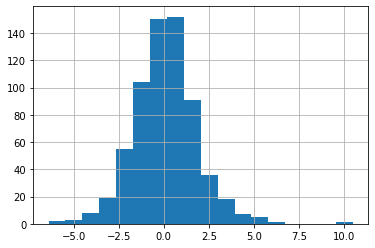

In [31]:
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins = 18)
plt.grid(True)
plt.show()

In [33]:
sec_dpc.describe()

count    652.000000
mean       0.083663
std        1.758158
min       -6.387665
25%       -0.992392
50%        0.106496
75%        1.057271
max       10.470588
Name: Close, dtype: float64

### 04. 일간 변동률 누적합 구하기

In [35]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-23    45.174069
2020-12-24    50.451471
2020-12-28    51.608284
2020-12-29    51.100024
2020-12-30    54.548300
Name: Close, Length: 652, dtype: float64

In [37]:
sec

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997
...,...,...,...,...,...,...
2020-12-23,72400.0,74000.0,72300.0,73900.0,73900.000000,19411326
2020-12-24,74100.0,78800.0,74000.0,77800.0,77800.000000,32502870
2020-12-28,79000.0,80100.0,78200.0,78700.0,78700.000000,40085044


### Summary

In [41]:
sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 # nan = 0
sec_dpc_cs = sec_dpc.cumsum() # 누적 수익률
sec_dpc_cs

[*********************100%***********************]  1 of 1 completed


Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-23    45.174069
2020-12-24    50.451471
2020-12-28    51.608284
2020-12-29    51.100024
2020-12-30    54.548300
Name: Close, Length: 652, dtype: float64

In [42]:
msft = pdr.get_data_yahoo('MSFT',start='2018-05-04')
msft_dpc = (msft['Close']-msft['Close'].shift(1))/msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0 # nan = 0
msft_dpc_cs = msft_dpc.cumsum() 
msft_dpc_cs

[*********************100%***********************]  1 of 1 completed


Date
2018-05-03      0.000000
2018-05-04      1.158716
2018-05-07      2.272627
2018-05-08      1.846516
2018-05-09      3.025939
                 ...    
2020-12-23     99.503665
2020-12-24    100.286398
2020-12-28    101.278544
2020-12-29    100.918475
2020-12-30     99.816533
Name: Close, Length: 671, dtype: float64

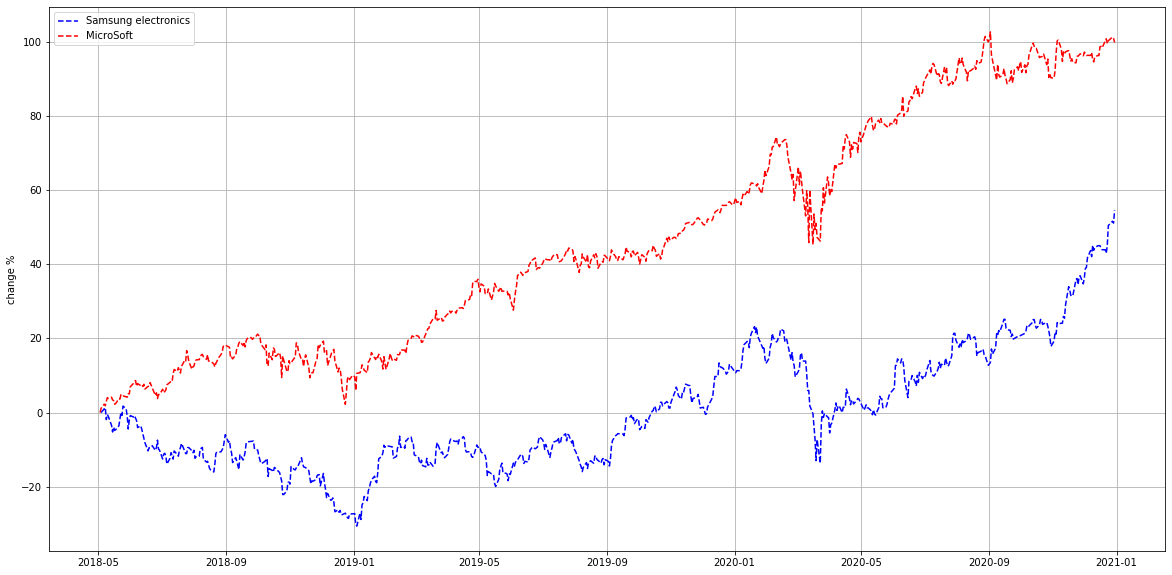

In [49]:
plt.figure(figsize=(20,10))
plt.plot(sec.index,sec_dpc_cs,'b--',label ='Samsung electronics')
plt.plot(msft.index, msft_dpc_cs,'r--',label='MicroSoft')
plt.ylabel('change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 05. 최대 손실 낙폭
- MDD(최대 손실 낙폭)은 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 읨한다. 퀀트 투자에서는 수익률을 높이는 것보다 최대 손실 낙폭을 낮추는 것이 중요하다. 의미하는 바로는 특정 기간동안 최대한 얼마의 손실이 날 수 있는 지를 나타낸다.

In [51]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

[*********************100%***********************]  1 of 1 completed


In [53]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = (kospi['Adj Close']-peak)/peak
max_dd = drawdown.rolling(window, min_periods=1).min()

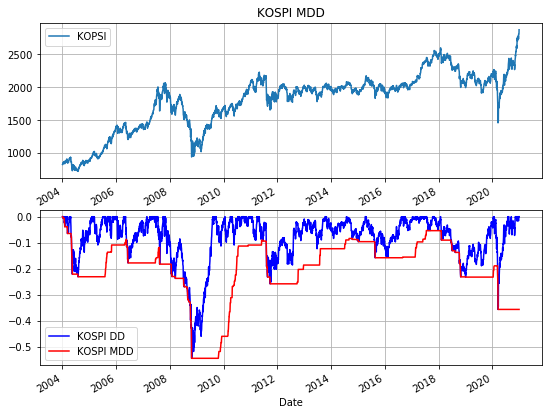

In [54]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOPSI',title='KOSPI MDD', grid= True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [55]:
max_dd.min()

-0.5453665130144085

In [57]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

### 06. 회귀분석과 상관관계

- 코스피와 다우존스 지수 비교

In [65]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


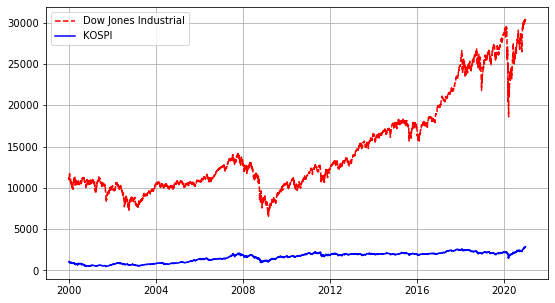

In [66]:
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close,'r--', label= 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close,'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 지수화 비교

In [69]:
d =(dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close/ kospi.Close.loc['2000-01-04']) * 100

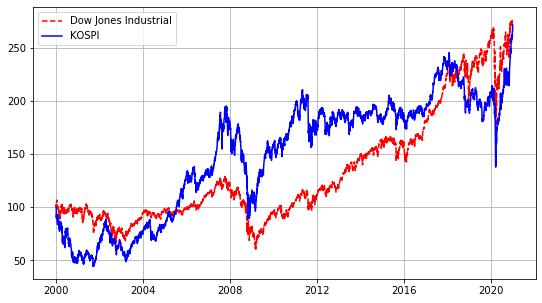

In [70]:
plt.figure(figsize=(9,5))
plt.plot(d.index, d,'r--', label= 'Dow Jones Industrial')
plt.plot(k.index, k,'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 산점도 분석

In [73]:
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI':kospi['Close']})

In [76]:
df.isnull().sum()

DOW      157
KOSPI    271
dtype: int64

In [80]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df.isnull().sum()

DOW      0
KOSPI    0
dtype: int64

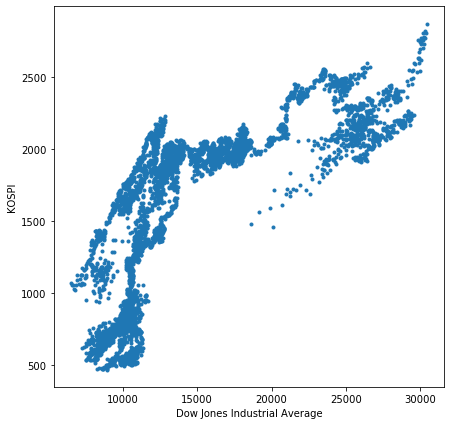

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

- Scipy 선형회귀 

In [82]:
from scipy import stats

In [83]:
regr = stats.linregress(df['DOW'],df['KOSPI'])
regr

LinregressResult(slope=0.07699160939917458, intercept=456.0165574561747, rvalue=0.7566866733890836, pvalue=0.0, stderr=0.000902064958601767)

### 7. 상관계수 구하기

In [85]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.756687
KOSPI,0.756687,1.000000


In [86]:
df['DOW'].corr(df['KOSPI'])

0.7566866733890836

- 결정계수 구하기 : 추정한 회귀선이 데이ㅓ를 어느 정도 설명하는지를 나타내는 계수로, 두 변수의 상관관계 정도를 나타내는 상관계수를 제곱한 값이다.

In [88]:
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value **2
r_squared # 1에 가까울 수록 잘 설명한다.

0.5725747216846376

- 다우존스 지수와 코스피의 회귀분석

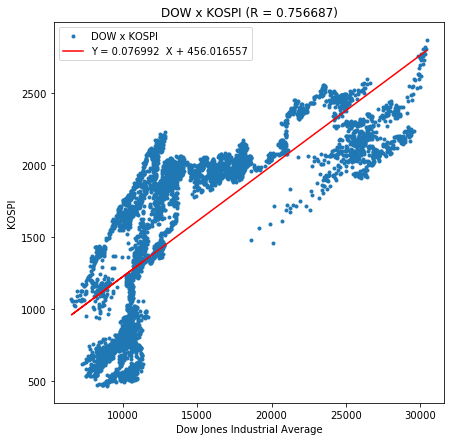

In [91]:
df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [92]:
regr

LinregressResult(slope=0.07699160939917458, intercept=456.0165574561747, rvalue=0.7566866733890836, pvalue=0.0, stderr=0.000902064958601767)

- 상관계수에 따른 리스크 완화 : 상관계수가 클수록 리스크 완화효과가 거의없고 작을수록 리스크 완화 효과가 있다.